# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

ValueError: shape mismatch: value array of shape (10,7) could not be broadcast to indexing result of shape (5,10)

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

## Bar and Pie Charts

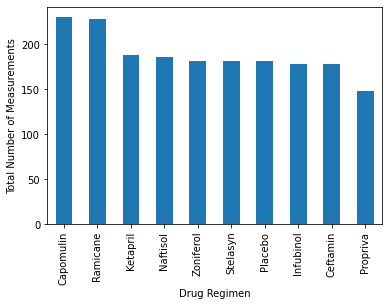

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = clean_study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.show()

In [10]:
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [13]:
drug_list = [ 'Capomulin'    ,
'Ramicane'     ,
'Ketapril'     ,
'Naftisol'     ,
'Zoniferol'    ,
'Stelasyn'     ,
'Placebo'      ,
'Infubinol'   ,
'Ceftamin' , 
'Propriva']

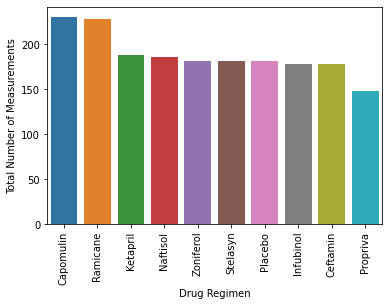

In [14]:
sns.barplot(x=drug_list, y=counts)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.show()

In [ ]:
tplot("opinion", col="CTQ-tool", col_wrap=4, data=df_original_small, kind="count", height=6.5, aspect=.8)


In [22]:
plt.style.use('seaborn')

IAP = df_original_small['Information and awareness purposes'].value_counts().to_frame().T
QE = df_original_small['Quarantine Enforcement'].value_counts().to_frame().T
CTCR = df_original_small['Contact Tracing and Cross-Referencing'].value_counts().to_frame().T
VPID = df_original_small['Voluntary provision of infection data'].value_counts().to_frame().T
QMA = df_original_small['Quarantine Monitoring App'].value_counts().to_frame().T
QRCode = df_original_small['QR code provided registration tracking'].value_counts().to_frame().T

total = pd.concat([IAP, QE, CTCR, VPID, QMA, QRCode])

fig, ax = plt.subplots(nrows=3, ncols=2)

labels = 'acceptable', 'unacceptable'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)

plt.title('Pie chart per CTQ-tool')
plt.tight_layout()

ax[0,0].pie(total.iloc[[0]], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0,0].set_title('Information and awareness purposes', fontweight='bold')
ax[0,1].pie(total.iloc[[1]],  startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0,1].set_title('Quarantine Enforcement', fontweight='bold')
ax[1,0].pie(total.iloc[[2]],  startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode2, shadow=True)
ax[1,0].set_title('Contact Tracing and Cross-Referencing', fontweight='bold')
ax[1,1].pie(total.iloc[[3]], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1,1].set_title('Voluntary provision of infection data', fontweight='bold')
ax[2,0].pie(total.iloc[[4]], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode2, shadow=True)
ax[2,0].set_title('Quarantine Monitoring App', fontweight='bold')
ax[2,1].pie(total.iloc[[5]], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[2,1].set_title('QR code provided registration tracking', fontweight='bold')


fig.suptitle('Public Opinion on CTQ-measures', fontsize=20, y=1.07, fontweight='bold', x=0.37)
fig.set_figheight(10)
fig.set_figwidth(7)
fig.legend(loc='best', labels=labels, fontsize='medium')
fig.tight_layout()

fig.savefig('Opinions_ctq')

plt.show()

NameError: name 'df_original_small' is not defined

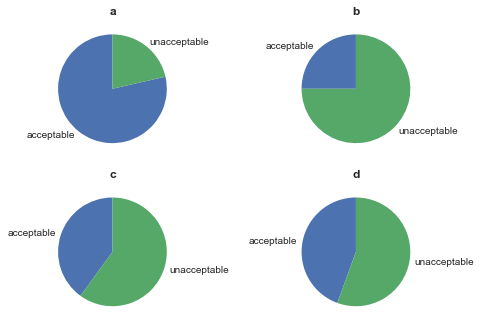

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'CTQ-tool':np.random.choice(['a','b','c','d'],50),
                  'opinion':np.random.choice(['acceptable','unacceptable'],50)})

fig, ax = plt.subplots(2,2)
ax = ax.flatten()
tab = pd.crosstab(df['CTQ-tool'],df['opinion'])
for i,cat in enumerate(tab.index):
    tab.loc[cat].plot.pie(ax=ax[i],startangle=90)
    ax[i].set_ylabel('')
    ax[i].set_title(cat, fontweight='bold')

In [24]:
df = pd.DataFrame(
    {
        "CTQ-tool": [
            "Information and awareness purposes",
            "Information and awareness purposes",
            "Information and awareness purposes",
            "Information and awareness purposes",
            "Information and awareness purposes",
            "Information and awareness purposes",
            "Quarantine Enforcement",
            "Quarantine Enforcement",
            "Quarantine Enforcement",
            "Quarantine Enforcement",
            "Quarantine Enforcement",
            "Quarantine Enforcement",
        ],
        "opinion": [
            "unacceptable",
            "unacceptable",
            "unacceptable",
            "unacceptable",
            "acceptable",
            "unacceptable",
            "acceptable",
            "unacceptable",
            "acceptable",
            "unacceptable",
            "unacceptable",
            "unacceptable",
        ],
    }
)

In [25]:
tools = df["CTQ-tool"].unique()

In [26]:
df_agg = df.groupby(by=["CTQ-tool", "opinion"]).size().reset_index(name="counts")

In [27]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])

NameError: name 'make_subplots' is not defined

In [28]:
#Python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [31]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [29]:
#import the deliveries data into a Pandas dataframe
#it is assumed that the dataset is saved in the same directory of your notebook
deliveries = pd.read_csv("deliveries.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'deliveries.csv'

In [32]:
df_tip = sns.load_dataset('tips')
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
data = df_tip.groupby("time")["tip"].sum()
data

time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64

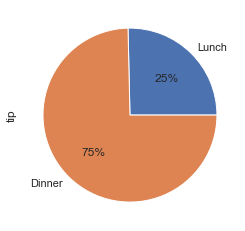

In [34]:
data.plot.pie(autopct="%.lf%%");

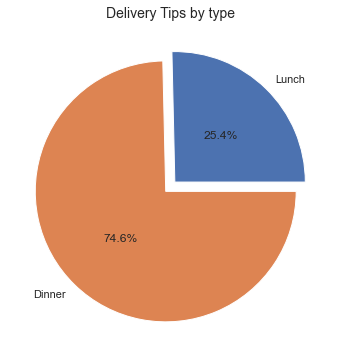

In [36]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);
pie.savefig("DeliveryPieChart.png")

In [37]:
data_per = data.groupby('time').agg(percentage =('tip', lambda p: p.sum() / data.sum() * 100)).round(2)

TypeError: func is expected but received tuple in **kwargs.

NameError: name 'data_per' is not defined

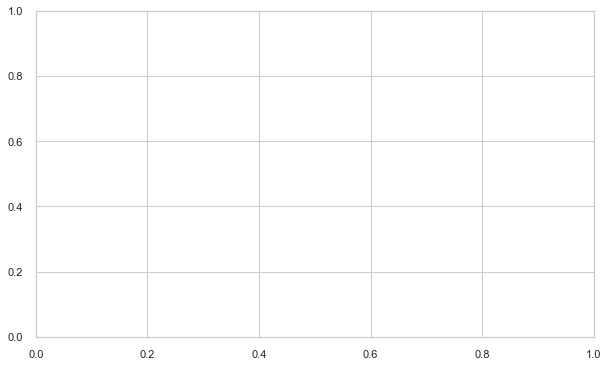

In [38]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
ax.set_xlabel ("Delivery Type")
ax.set_ylabel ("Percentage")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

In [ ]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="percentage", y=data_per.index, data=data_per, ci=None, palette="muted",orient='h' )
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
ax.set_xlabel ("Percentage")
ax.set_ylabel ("Delivery Type")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

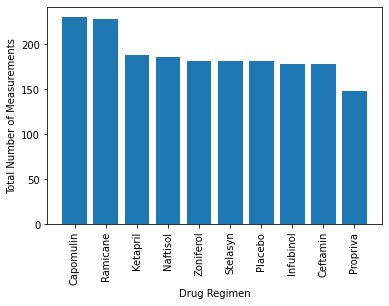

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
counts = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.show()

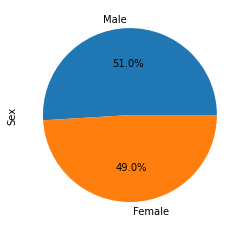

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_study_data_complete.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()


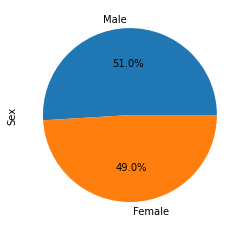

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_study_data_complete.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


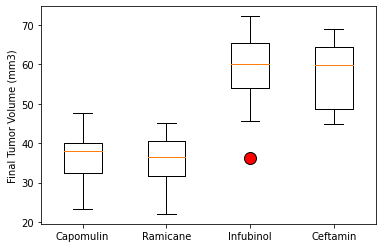

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

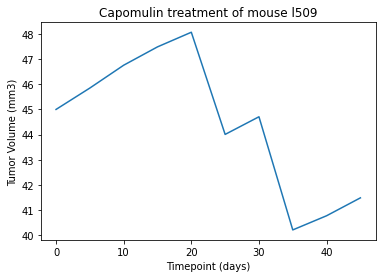

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()